In [22]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 3: Image Enhancement III: Sharpening

In this task, we will implement unsharp masking in two different forms:
1. Using laplacian as mentioned in lecture notes, i.e. $\dot{f} = \nabla^2 f$
2. Using difference of original and blurred images, i.e. $\dot{f} = f - f_{blur}$

Unsharp masking:
$$
f = f + A\dot{f}
$$

In [23]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-b68g73kk
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=517be9174dae242d0d598e3f7db4ea9b45f73cec51c44cbb42c4a88adbc5f845
  Stored in directory: /tmp/pip-ephem-wheel-cache-y2fv6ph9/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-b68g73kk


In [24]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=3) # download data for this assignment

Download Complete!


In [25]:
def unsharp_laplacian(img, laplacian_operator, A=1):
    '''
    Write a program to implement unsharp masking based on laplacian operator.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + laplacian_operator - a 3 x 3 laplacian operator, refer to slides.
    + A - strength parameter of unsharp masking
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.filter2D() to perform 2D convolution
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    f_dot = cv2.filter2D(img.copy(),-1,laplacian_operator)
    out_img = img.copy() + (A*f_dot)
    
    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [26]:
def unsharp_blur(img, blur_kernel=5, A=1):
    '''
    Write a program to implement unsharp masking based on difference of original and blurred image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + A - strength parameter of unsharp masking
    + blur_kernel - kernel size for gaussian blur operation. 
                    For gaussian kernel use sigma = nearest integer to (blur_kernel/5)
    
    Ouputs:
    + out_img - Unsharp masked grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    + cv2.GaussianBlur to perform blur operations
    
    Hint:
    + 
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    f_dot = img.copy() - cv2.GaussianBlur(img.copy(),(blur_kernel,blur_kernel),int(blur_kernel/5))
    out_img = img.copy() + (A*f_dot)
    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [27]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

car = cv2.imread('data/car_wiki.png', 0)
moon = cv2.imread('data/moon.jpg', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------------------
#    Car | A: -2
-------------------------------------


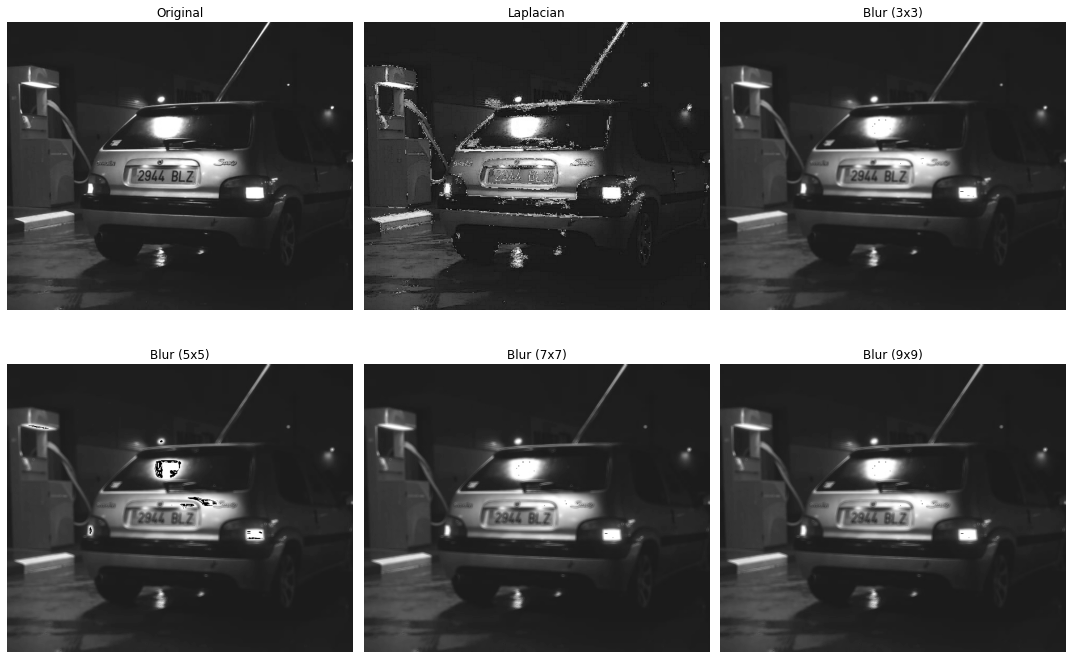


-------------------------------------
#    Car | A: -1
-------------------------------------


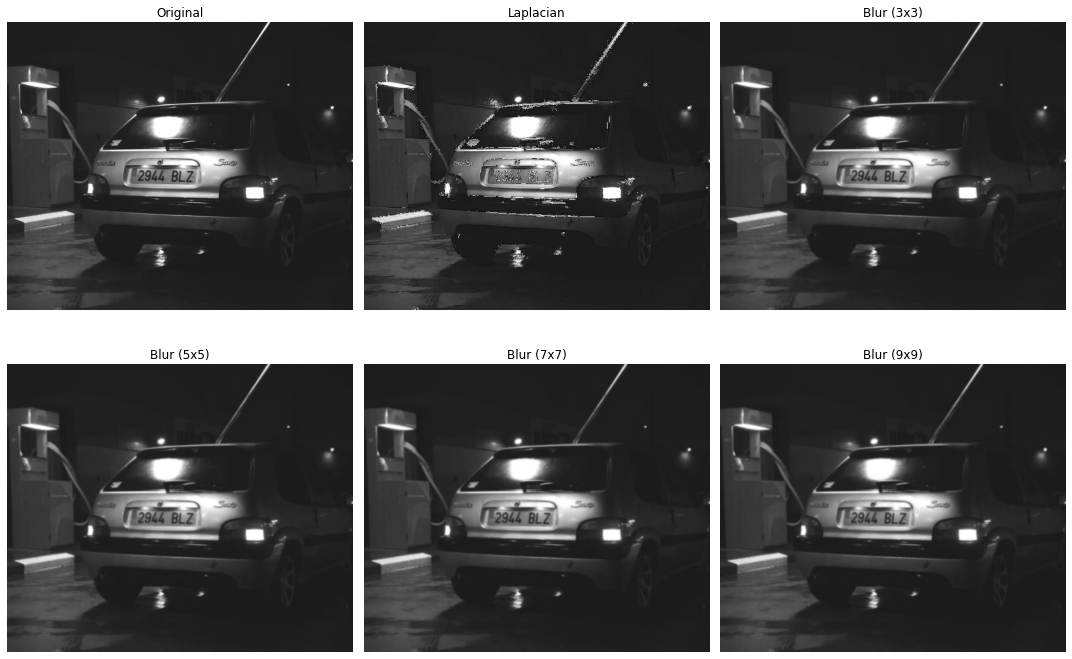


-------------------------------------
#    Car | A: 1
-------------------------------------


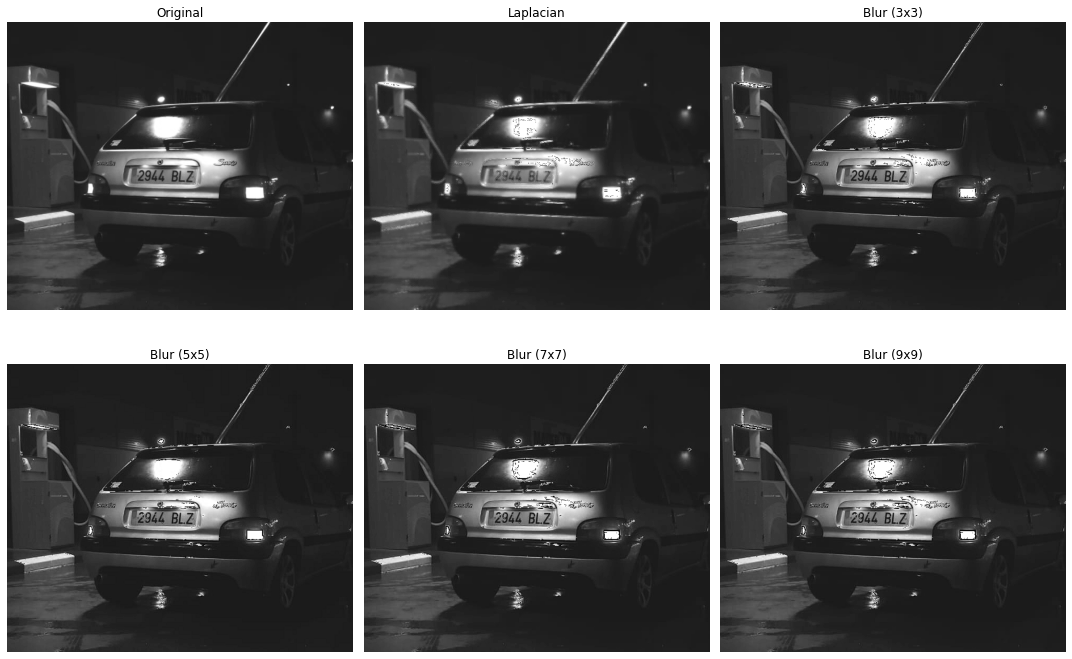


-------------------------------------
#    Car | A: 2
-------------------------------------


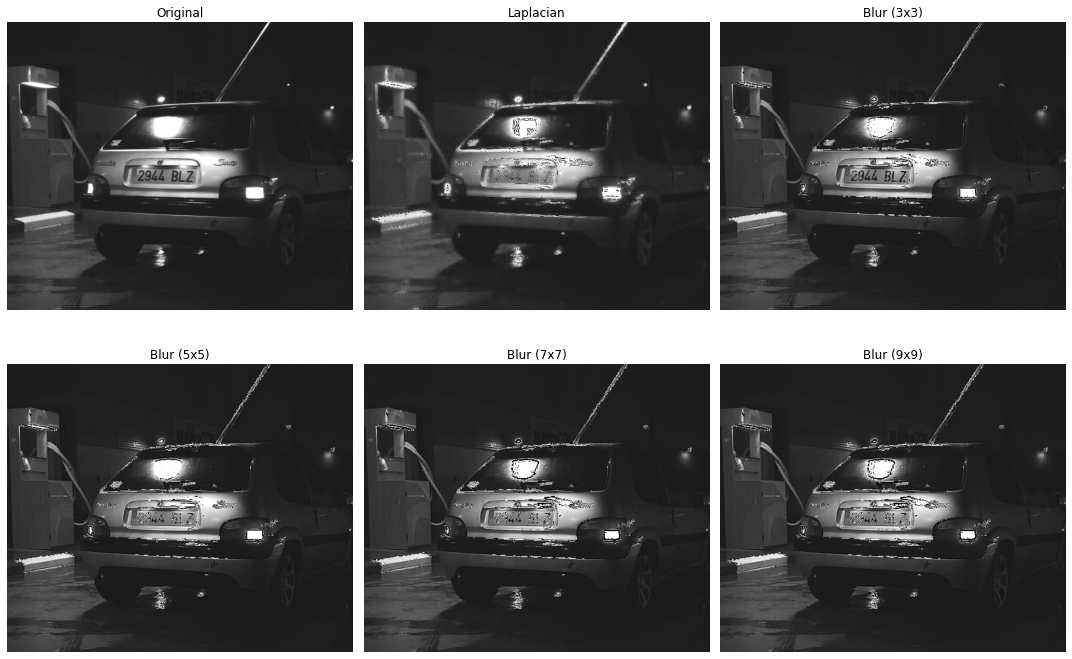


-------------------------------------
#    Moon | A: -2
-------------------------------------


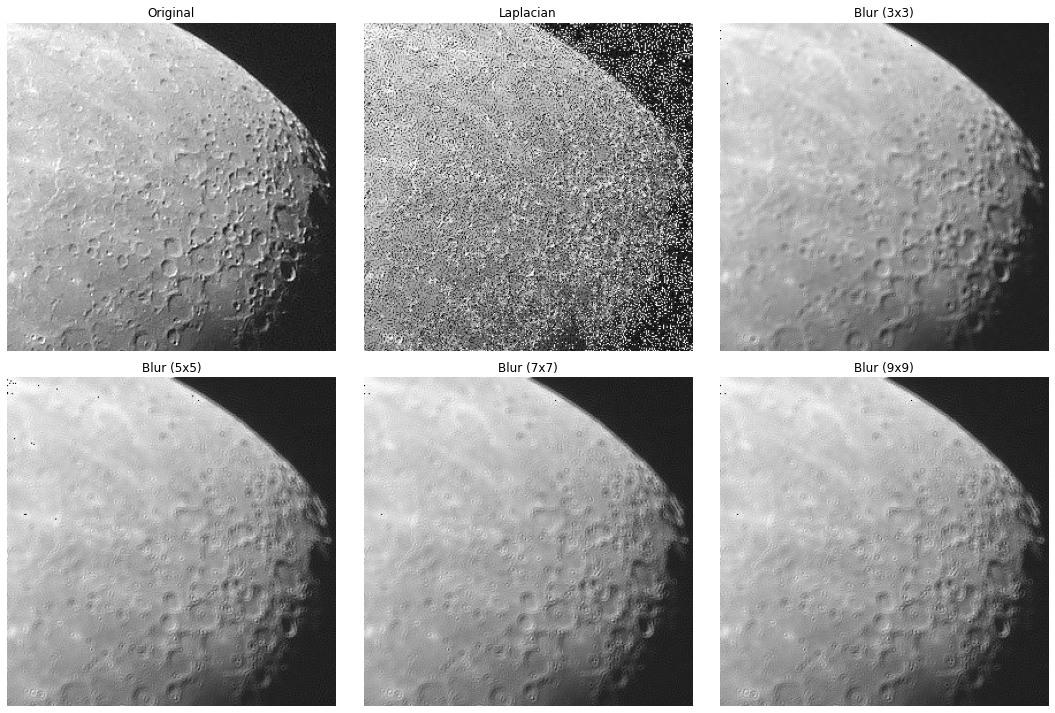


-------------------------------------
#    Moon | A: -1
-------------------------------------


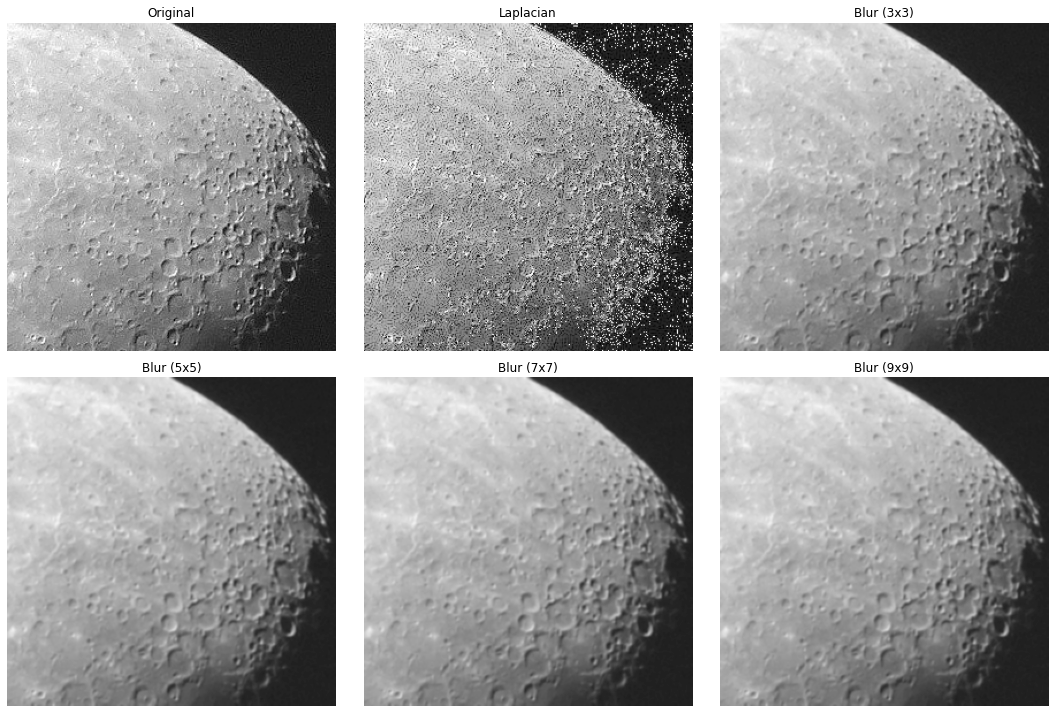


-------------------------------------
#    Moon | A: 1
-------------------------------------


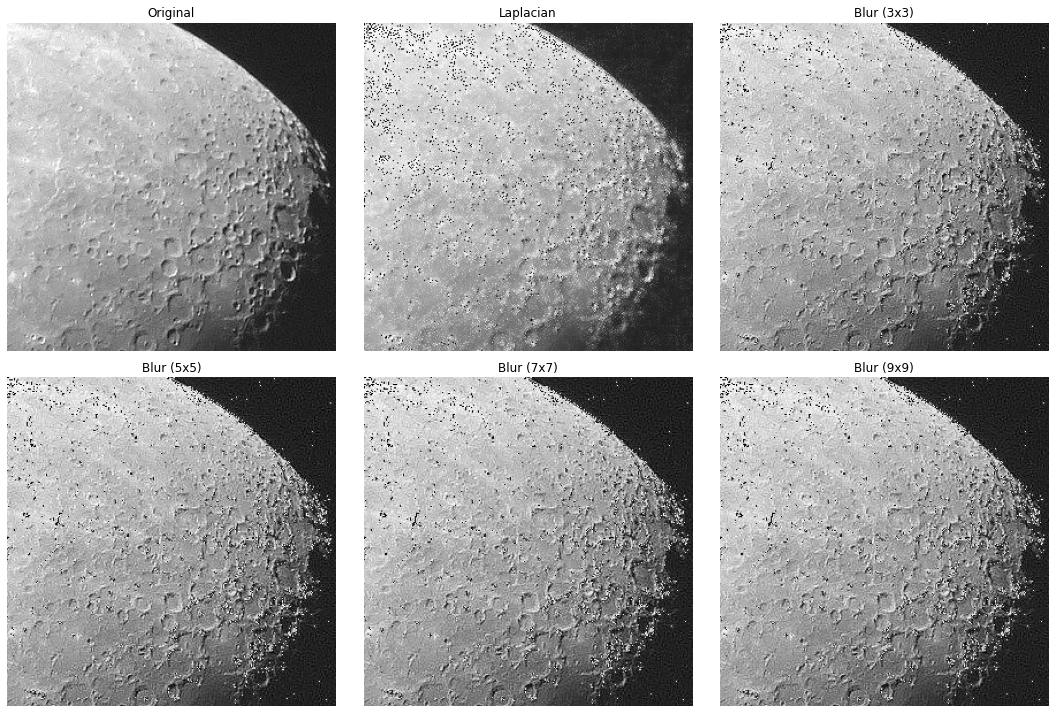


-------------------------------------
#    Moon | A: 2
-------------------------------------


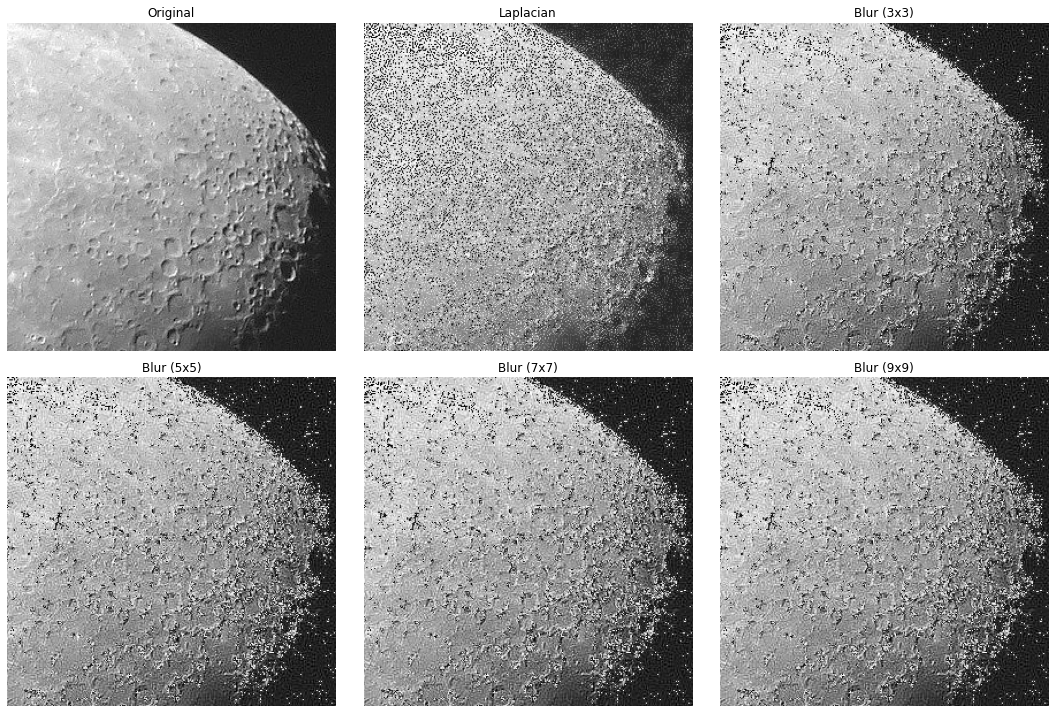

In [33]:
img_arr = [car, moon]
img_caption = ["Car", "Moon"]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        print("\n-------------------------------------")
        print("#   ", img_caption[i], "| A:", A)
        print("-------------------------------------")

        fig = plt.figure(figsize=(15, 10))
        plot_frame(2, 3, 0, img_arr[i], "Original")

        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        plot_frame(2, 3, 1, tmp_img, "Laplacian")

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            plot_frame(2, 3, 2+j, tmp_img, "Blur (" + str(kernel_size) + "x" + str(kernel_size) + ")")
            j += 1
        
        fig.tight_layout()
        plt.show()

In [36]:
your_observation = """
In laplacian, f_dot gives us edges in the pictures, so when we add them to our original picture the edges are highlighted.
I guess here, Blur unmask handles negative values of A far better than laplacian.

In blur umask, similarly f_dot contains sharp changes which survives even after substracting the blurred version of the img.
Adding that to image again, highlights those sharp changes, making image more sharp.

Both methods do not seem to be working well with extreme values of A, both in positive and negative sides.
We might have to tune A, to get the sharpness we want otherwise it will just loose critical information/shape from image.
"""

print(your_observation)


In laplacian, f_dot gives us edges in the pictures, so when we add them to our original picture the edges are highlighted.
I guess here, Blur unmask handles negative values of A far better than laplacian.

In blur umask, similarly f_dot contains sharp changes which survives even after substracting the blurred version of the img.
Adding that to image again, highlights those sharp changes, making image more sharp.

Both methods do not seem to be working well with extreme values of A, both in positive and negative sides.
We might have to tune A, to get the sharpness we want otherwise it will just loose critical information/shape from image.



In [35]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

lap_img = []
blur_img = []

img_arr = [car, moon]
laplacian_operator = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])

for i in range(2):
    for A in [-2, -1, 1, 2]:
        tmp_img = unsharp_laplacian(np.copy(img_arr[i]), laplacian_operator, A=A)
        lap_img.append(tmp_img)

        j = 0
        for kernel_size in [3, 5, 7, 9]:
            tmp_img = unsharp_blur(np.copy(img_arr[i]), blur_kernel=kernel_size, A=A)
            blur_img.append(tmp_img)
            j += 1

gen_imgs = lap_img+blur_img
task3_submission = np.array(gen_imgs)